In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv("shopping_data.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [11]:
data = df.iloc[:,3:5].values

In [12]:
data


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

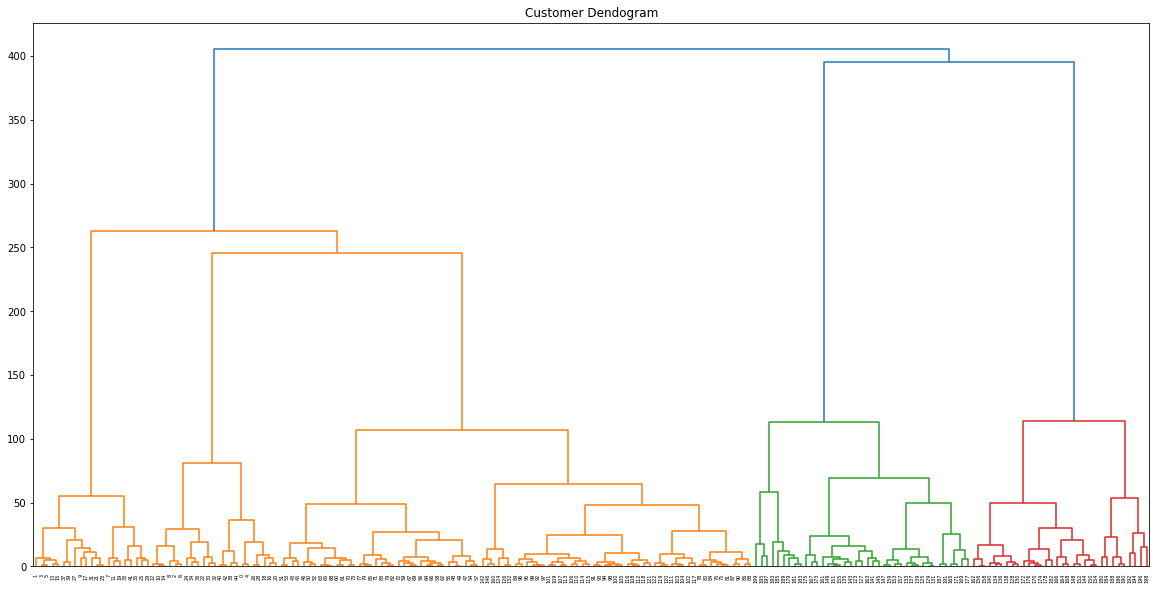

In [20]:
#create dendogram

import scipy.cluster.hierarchy as shc

plt.figure(figsize= (20,10))
plt.title("Customer Dendogram")

dend = shc.dendrogram(shc.linkage (data, method = "ward"))


In [21]:
#by using dendogram we select the no.of clusters

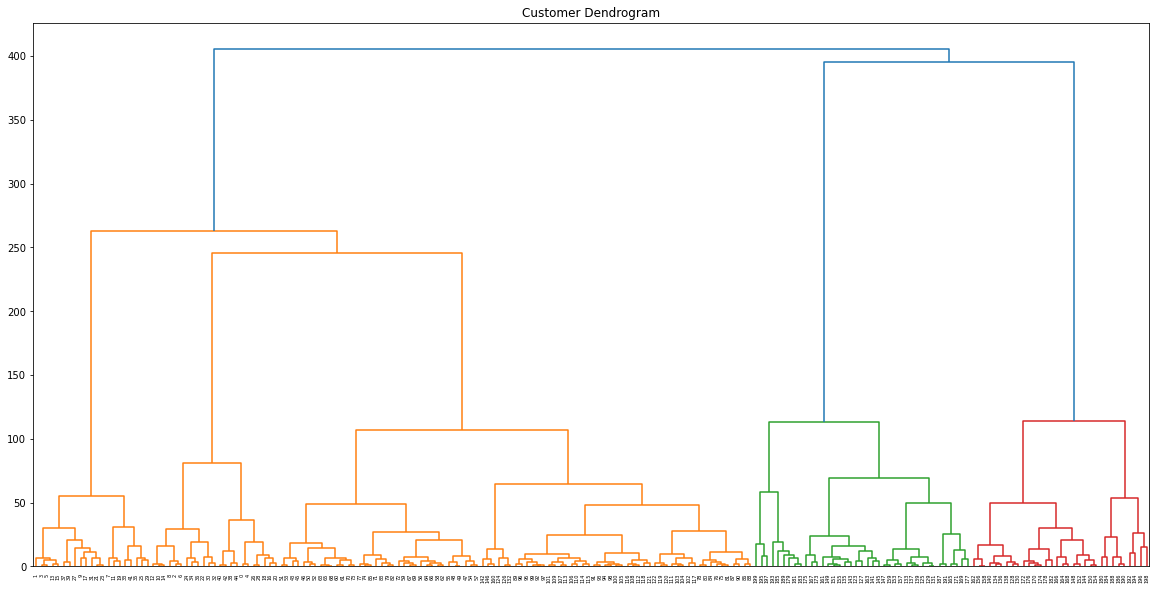

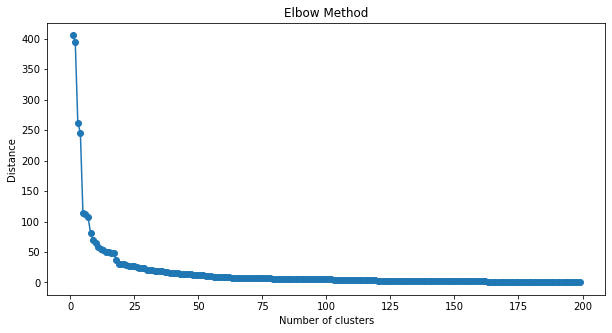

In [22]:
# Perform hierarchical clustering
linkage_matrix = shc.linkage(data, method="ward")

# Plot dendrogram
plt.figure(figsize=(20, 10))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(linkage_matrix)
plt.show()

# Calculate the distances (heights) between successive merges
distances = linkage_matrix[:, 2]

# Plot the distances to visualize the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(distances) + 1), distances[::-1], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow Method')
plt.show()

In [30]:
#call AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

In [50]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [51]:
agglo = cluster.fit_predict(data)

In [52]:
agglo

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

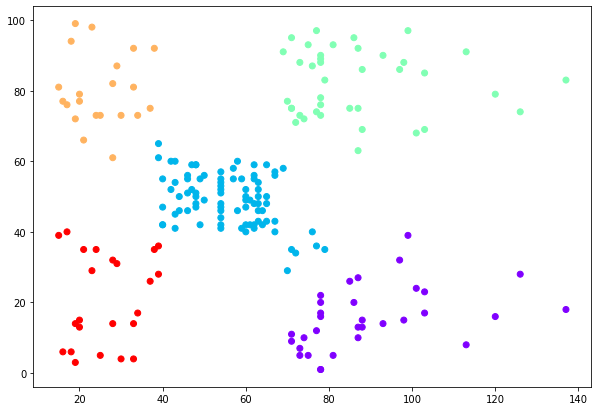

In [53]:
plt.figure(figsize = (10,7))

plt.scatter(data[:,0], data[:,1], c = cluster.labels_, cmap = 'rainbow')

In [66]:
# Function to predict the cluster for a new data point
def predict_new_point(model, data, new_point):
    # Calculate distances from new point to each point in the dataset
    distances = cdist(data, new_point.reshape(1, -1), metric='euclidean')
    # Find the index of the nearest point
    nearest_index = np.argmin(distances)
    # Assign the new point to the cluster of the nearest point
    return model.labels_[nearest_index]
# Example new data point
new_data_point = np.array([20, 50])  # Replace with your new data point



# Predict the cluster for the new data point
predicted_cluster = predict_new_point(cluster, data, new_data_point)


In [67]:
print(f"The new data point {new_data_point} is assigned to cluster {predicted_cluster}.")


The new data point [45 50] is assigned to cluster 1.


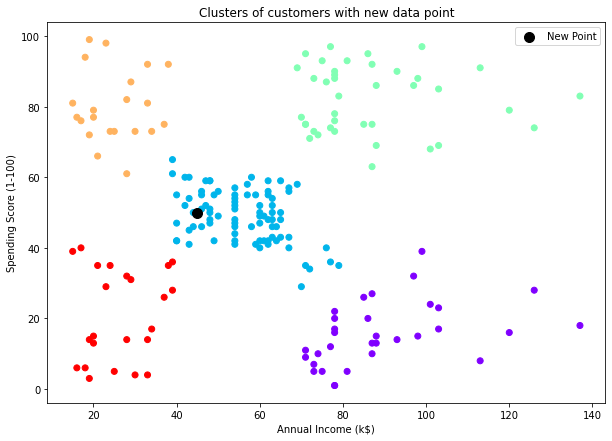

In [68]:
# Plot the new data point
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.scatter(new_data_point[0], new_data_point[1], color='black', label='New Point', s=100)
plt.title("Clusters of customers with new data point")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()